In [94]:
import pandas as pd
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

In [7]:
data = pd.read_excel("Homework_5_Data.xlsx")

In [51]:
data[data.columns[2:]] = data[data.columns[2:]]/100

In [52]:
data

,Unnamed: 0,Week,t=.25,t=2,t=3,t=5,t=7,t=10
0,NaN,1,0.0675,0.0792,0.0816,0.0848,0.0880,0.0897
1,NaN,2,0.0675,0.0761,0.0783,0.0813,0.0842,0.0860
2,NaN,3,0.0670,0.0751,0.0773,0.0801,0.0829,0.0849
3,NaN,4,0.0660,0.0722,0.0748,0.0776,0.0806,0.0826
4,NaN,5,0.0640,0.0710,0.0732,0.0764,0.0795,0.0812
...,...,...,...,...,...,...,...,...
645,NaN,646,0.0648,0.0652,0.0648,0.0637,0.0639,0.0615
646,NaN,647,0.0644,0.0656,0.0650,0.0636,0.0636,0.0613
647,NaN,648,0.0643,0.0638,0.0632,0.0619,0.0621,0.0599
648,NaN,649,0.0644,0.0655,0.0649,0.0637,0.0642,0.0619


In [14]:

def ln_ax(alpha_x, beta_x, sigma_x,T):
    return (sigma_x**2/(2*beta_x) - alpha_x/beta_x )*T + (alpha_x/beta_x**2 - sigma_x**2/beta_x**3)*(1-np.exp(-beta_x*T)) + (sigma_x**2/(4*beta_x**3))*(1-np.exp(-2*beta_x*T))
def bx(beta_x,T):
    return (1-np.exp(-beta_x*T))/beta_x

In [15]:
def ln_ay(alpha_y, beta_y, sigma_y,T):
    return (sigma_y**2/(2*beta_y) - alpha_y/beta_y )*T + (alpha_y/beta_y**2 - sigma_y**2/beta_y**3)*(1-np.exp(-beta_y*T)) + (sigma_y**2/(4*beta_y**3))*(1-np.exp(-2*beta_y*T))
def by(beta_y,T):
    return (1-np.exp(-beta_y*T))/beta_y

In [62]:

def fun(k):
    alpha_x = k[0]
    alpha_y = k[1]
    beta_x = k[2]
    beta_y = k[3]
    sigma_x = k[4]
    sigma_y = k[5]
    total_sse = 0
    for j in range(0,len(data)):
        m_list = [[bx(beta_x,0.25)/0.25, by(beta_y,0.25)/0.25], [bx(beta_x,10)/10, by(beta_y,10)/10]]
        A = np.array(m_list)
        B = np.array([data["t=.25"][j]+ln_ax(alpha_x, beta_x, sigma_x,.25)/.25+ln_ay(alpha_y, beta_y, sigma_y,.25)/.25, data["t=10"][j]+ln_ax(alpha_x, beta_x, sigma_x,10)/10+ln_ay(alpha_y, beta_y, sigma_y,10)/10])

        X = np.linalg.inv(A).dot(B)

        sse = 0
        for i in data.columns[3:-1]:
            pred_val = (-ln_ax(alpha_x, beta_x, sigma_x,float(i[-1]))/float(i[-1]))-ln_ay(alpha_y, beta_y, sigma_y,float(i[-1]))/float(i[-1]) + bx(beta_x,float(i[-1]) )*X[0]/float(i[-1]) + by(beta_y,float(i[-1]))*X[1]/float(i[-1])

            sse+= (data[i][j] - pred_val)**2
        total_sse += sse

    return total_sse




In [100]:
bnds = ((0.001, None), (0.001, 1),(0.001, 1),(0.001, 1),(0.001, 1),(0.001, 1))
res = minimize(fun, [.1, .2,.1,0.15,0.05,0.5], method='Nelder-Mead',bounds = bnds)

In [102]:
res,res.x

(       message: Optimization terminated successfully.
        success: True
         status: 0
            fun: 0.018023312452263202
              x: [ 1.000e-03  3.890e-02  1.472e-01  7.061e-02  8.551e-02
                   2.623e-01]
            nit: 737
           nfev: 1175
  final_simplex: (array([[ 1.000e-03,  3.890e-02, ...,  8.551e-02,
                          2.623e-01],
                        [ 1.004e-03,  3.890e-02, ...,  8.552e-02,
                          2.623e-01],
                        ...,
                        [ 1.022e-03,  3.889e-02, ...,  8.552e-02,
                          2.623e-01],
                        [ 1.020e-03,  3.889e-02, ...,  8.552e-02,
                          2.622e-01]]), array([ 1.802e-02,  1.802e-02,  1.802e-02,  1.802e-02,
                         1.802e-02,  1.802e-02,  1.802e-02])),
 array([0.001     , 0.03890253, 0.14715713, 0.07060793, 0.08551227,
        0.2623077 ]),
 array([0.001     , 0.03890253, 0.14715713, 0.07060793, 0.085512

In [88]:
paras = res.x

In [120]:
print("values of the parameters alpha_x, alpha_y, beta_x, beta_y, sigma_x, sigma_y are correspondingly: ",paras)

values of the parameters alpha_x, alpha_y, beta_x, beta_y, sigma_x, sigma_y are correspondingly:  [0.001      0.03890253 0.14715713 0.07060793 0.08551227 0.2623077 ]


In [103]:
k = paras
alpha_x = k[0]
alpha_y = k[1]
beta_x = k[2]
beta_y = k[3]
sigma_x = k[4]
sigma_y = k[5]
xs = []
ys = []
for j in range(0,len(data)):
    m_list = [[bx(beta_x,0.25)/0.25, by(beta_y,0.25)/0.25], [bx(beta_x,10)/10, by(beta_y,10)/10]]
    A = np.array(m_list)
    B = np.array([data["t=.25"][j]+ln_ax(alpha_x, beta_x, sigma_x,.25)/.25+ln_ay(alpha_y, beta_y, sigma_y,.25)/.25, data["t=10"][j]+ln_ax(alpha_x, beta_x, sigma_x,10)/10+ln_ay(alpha_y, beta_y, sigma_y,10)/10])

    X = np.linalg.inv(A).dot(B)
    xs.append(X[0])
    ys.append(X[1])
    

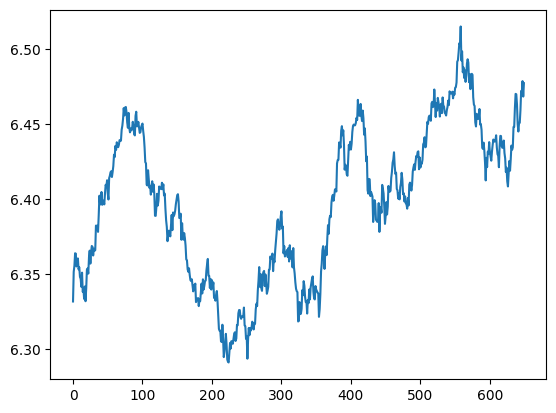

In [109]:
plt.plot([i for i in range(0,len(data))],xs)


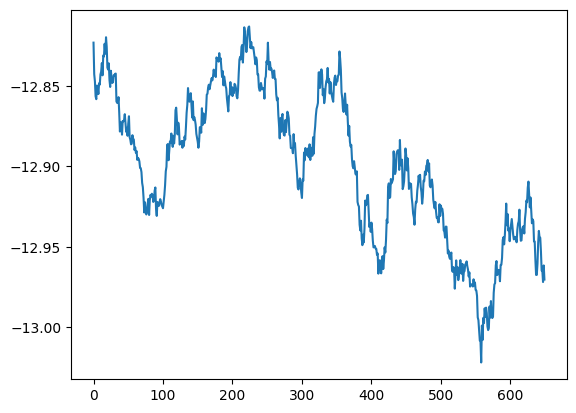

In [110]:
plt.plot([i for i in range(0,len(data))],ys)

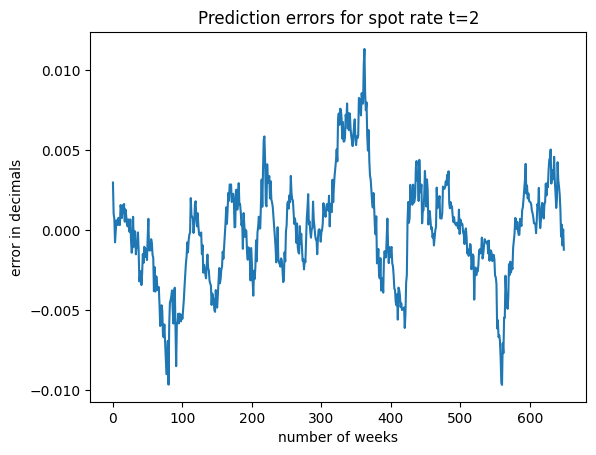

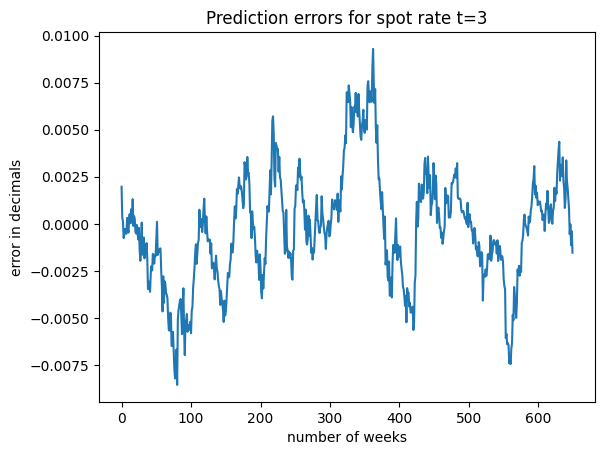

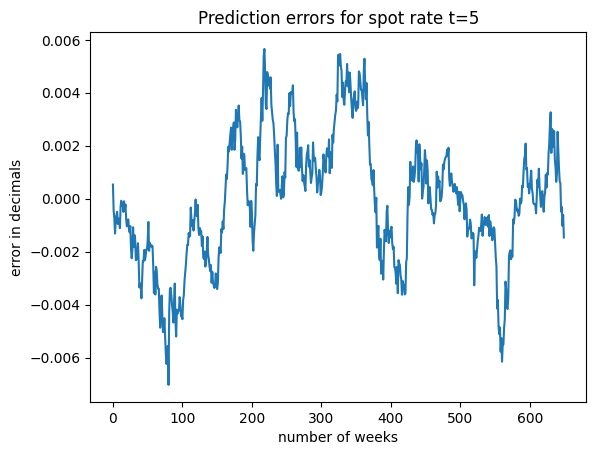

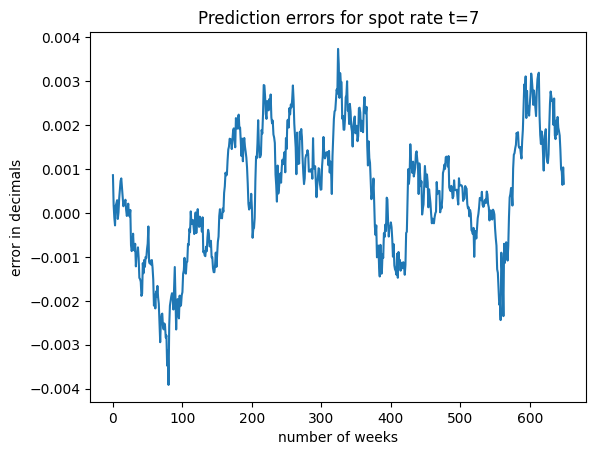

In [114]:

for i in data.columns[3:-1]:
    error = []
    for j in range(0,len(data)):

        pred_val = (-ln_ax(alpha_x, beta_x, sigma_x,float(i[-1]))/float(i[-1]))-ln_ay(alpha_y, beta_y, sigma_y,float(i[-1]))/float(i[-1]) + bx(beta_x,float(i[-1]) )*xs[j]/float(i[-1]) + by(beta_y,float(i[-1]))*ys[j]/float(i[-1])
        error.append(data[i][j] - pred_val)
    
    plt.plot([i for i in range(0,len(data))],error)
    plt.xlabel("number of weeks")
    plt.ylabel("error in decimals")
    plt.title("Prediction errors for spot rate " + i)
    plt.show()

From the graphs of the errors in the predicted value and actual value, we can see that it continously hovers around 0. Which means the predicted valued converges pretty well to the actual value.


In [119]:
for i in data.columns[3:-1]:
    error = []
    for j in range(0,len(data)):

        pred_val = (-ln_ax(alpha_x, beta_x, sigma_x,float(i[-1]))/float(i[-1]))-ln_ay(alpha_y, beta_y, sigma_y,float(i[-1]))/float(i[-1]) + bx(beta_x,float(i[-1]) )*xs[j]/float(i[-1]) + by(beta_y,float(i[-1]))*ys[j]/float(i[-1])
        error.append(data[i][j] - pred_val)
    print("mean of the errors for spot rate " + i + "= " + str(np.mean(error)*100))
    print("Standard deviation of the errors for spot rate " + i + "= " + str(np.std(error)))

mean of the errors for spot rate t=2= -4.8463809312726624e-05
Standard deviation of the errors for spot rate t=2= 0.0032508385567841876
mean of the errors for spot rate t=3= -0.00024053747755063885
Standard deviation of the errors for spot rate t=3= 0.003006934686383083
mean of the errors for spot rate t=5= -8.162503790968127e-05
Standard deviation of the errors for spot rate t=5= 0.0024254906964170293
mean of the errors for spot rate t=7= 0.0004861261343067769
Standard deviation of the errors for spot rate t=7= 0.0013900978636191396
